In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import PHONBANK_DFS
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(PHONBANK_DFS/'transcript_df.pickle')
transcript_df['dataset'] = [i.split('_')[2] for i in transcript_df.transcript_root_name.values]
transcript_df[:3]

,transcript_id,transcript_root_name,corpus,version,date,language,media,xml_loc,dataset
0,2M-AA,corpora_Spanish_Vivar_Santiago_2M-AA,Santiago,PB1.2,2016-11-06,spa,Vivar/Santiago/2M-AA.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar
0,4M-MB,corpora_Spanish_Vivar_Santiago_4M-MB,Santiago,PB1.2,2016-11-20,spa,Vivar/Santiago/4M-MB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar
0,2A-IB,corpora_Spanish_Vivar_Santiago_2A-IB,Santiago,PB1.2,2016-11-08,spa,Vivar/Santiago/2A-IB.wav,/mnt/cube/tsainbur/Projects/github_repos/child...,Vivar


In [5]:
transcript_df.dataset.unique()

array(['Vivar', 'LlinasOjea', 'Koine', 'Tsay', 'StanfordFrench',
       'GoadRose', 'Lyon', 'Hunkeler', 'KernFrench', 'Yamaguchi', 'Paris',
       'Smith', 'Almeida', 'PraisleyRose', 'FallsChurch', 'Scheidnes',
       'VYSA', 'KernRomanian', 'Freitas', 'CCF', 'EstevePrieto',
       'Lahrouchi', 'Kuwaiti copy', 'Kuwaiti', 'KernArabic',
       'Kuwaiti copy 2', 'CCLAS', 'Gildersleeve', 'WeistJarosz', 'TAKI',
       'Stuttgart', 'Grimm', 'CLPF', 'Zink', 'Utrecht', 'Cummings',
       'TorringtonEaton', 'Chiat', 'Preston', 'McAllisterByun',
       'Bernhardt', 'Granada', 'StanfordSwedish', 'Lacerda', 'Garmann',
       'ComptonPater', 'Davis-CDI', 'Davis', 'StanfordEnglish', 'Goad',
       'Providence', 'Penney', 'Inkelas', 'Ota', 'StanfordJapanese'],
      dtype=object)

In [6]:
datasets_to_use = ['Yamaguchi',
                   'GoadRose',
                   "Hunkeler",
                   'KernFrench',
                   'Lyon',
                   'Paris',
                   'StanfordFrench'
                   
              ] 

In [7]:
dataset_mask = np.array([i in datasets_to_use for i in transcript_df.dataset.values])
transcript_df = transcript_df[dataset_mask]

In [8]:
transcript_df = transcript_df[transcript_df.language == 'fra']

In [9]:
len(transcript_df)

803

In [10]:
participants = list((PHONBANK_DFS / 'participants').glob('*.pickle'))
transcripts = list((PHONBANK_DFS / 'transcripts').glob('*.pickle'))
participants[:2], transcripts[:2]

([PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/processed/phonbank/participants/corpora_German_Stuttgart_VZ_VZ6052.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/processed/phonbank/participants/corpora_Biling_Scheidnes_NWR-71_SES1-LOT.pickle')],
 [PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/processed/phonbank/transcripts/corpora_Biling_Almeida_por_010824p.pickle'),
  PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/processed/phonbank/transcripts/corpora_German_TAKI_RL_RL5043.pickle')])

In [11]:
len(transcripts), len(participants)

(6608, 6608)

In [12]:
transcript_df

,transcript_id,transcript_root_name,corpus,version,date,language,media,xml_loc,dataset
0,cha25ii,corpora_French_StanfordFrench_cha_cha25ii,cha,PB1.2,1986-11-22Z,fra,NaN,/mnt/cube/tsainbur/Projects/github_repos/child...,StanfordFrench
0,cha04ii,corpora_French_StanfordFrench_cha_cha04ii,cha,PB1.2,1986-08-06Z,fra,NaN,/mnt/cube/tsainbur/Projects/github_repos/child...,StanfordFrench
0,cha15i,corpora_French_StanfordFrench_cha_cha15i,cha,PB1.2,1986-10-11Z,fra,NaN,/mnt/cube/tsainbur/Projects/github_repos/child...,StanfordFrench
0,cha00,corpora_French_StanfordFrench_cha_cha00,cha,PB1.2,1986-06-12Z,fra,NaN,/mnt/cube/tsainbur/Projects/github_repos/child...,StanfordFrench
0,cha15ii,corpora_French_StanfordFrench_cha_cha15ii,cha,PB1.2,1986-10-25Z,fra,NaN,/mnt/cube/tsainbur/Projects/github_repos/child...,StanfordFrench
...,...,...,...,...,...,...,...,...,...
0,010423,corpora_French_Paris_Julie_010423,Julie,PB1.2,2008-05-03,fra,010423.mov,/mnt/cube/tsainbur/Projects/github_repos/child...,Paris
0,010916,corpora_French_Paris_Julie_010916,Julie,PB1.2,2008-09-26,fra,010916.mov,/mnt/cube/tsainbur/Projects/github_repos/child...,Paris
0,020122,corpora_French_Paris_Julie_020122,Julie,PB1.2,2009-02-02,fra,020122.mov,/mnt/cube/tsainbur/Projects/github_repos/child...,Paris
0,011111,corpora_French_Paris_Julie_011111,Julie,PB1.2,2008-11-21,fra,011111.mov,/mnt/cube/tsainbur/Projects/github_repos/child...,Paris


In [13]:
import pickle5 as pickle

In [14]:
def load_pickle_protocol5(path):
    with open(path, "rb") as fh:
        data = pickle.load(fh)
    return data

In [15]:
all_transcript_df = pd.concat([load_pickle_protocol5(i) for i in tqdm(transcripts)])
len(all_transcript_df)

2421443

In [16]:
all_transcript_df[:3]

,record_id,speaker,orthography,start_time_ms,duration_ms,ipa_model,ipa_actual,transcript_id,xml_loc
0,d02e8b7e-ec09-40a5-836b-00c14a3af2ba,CHI,"[xxx, xxx]",1051.0,3000.0,"[None, None]","[None, None]",010824p,/mnt/cube/tsainbur/Projects/github_repos/child...
0,f0be0051-38c9-4b84-a7da-bd74422b60b3,CHI,"[xxx, xxx]",24395.0,3000.0,"[None, None]","[None, None]",010824p,/mnt/cube/tsainbur/Projects/github_repos/child...
0,0b699b5b-4586-4755-8a25-fd42a1d983f3,CHI,[sim],27396.0,2755.0,[sĩ],[θĩ],010824p,/mnt/cube/tsainbur/Projects/github_repos/child...


In [17]:
all_participant_df = pd.concat([load_pickle_protocol5(i) for i in tqdm(participants)])
len(all_participant_df)

6608

In [18]:
all_participant_df[:3]

,participant_id,role,name,age,birthday,sex,language,transcript_id,xml_loc
0,MOT,Mother,VZ,P35Y0M0DT0H0M0S,NaN,female,deu,VZ6052,/mnt/cube/tsainbur/Projects/github_repos/LRSO_...
0,CHI,Target Child,LOT,P6Y5M14DT0H0M0S,2007-11-03,male,fra,SES1-LOT,/mnt/cube/tsainbur/Projects/github_repos/child...
0,CHI,Target Child,Joana,P4Y6M0DT0H0M0S,1995-06-22,female,por,040600,/mnt/cube/tsainbur/Projects/github_repos/child...


In [19]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [20]:
ages = [convert_age(age) if type(age) == str else np.nan for age in tqdm(all_participant_df.age.values) ]

Text(0.5, 1.0, 'age of participant')

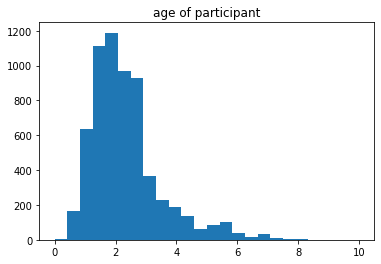

In [21]:
fig, ax = plt.subplots()
ax.hist(np.array(ages)/12, bins=np.linspace(0,10,25));
ax.set_title('age of participant')

### Create a phone dataset of english 

In [22]:
all_participant_df.role.unique()

array(['Mother', 'Target Child', 'Investigator', 'Child', 'Target Adult',
       'Sister', 'Subject', 'Target_Child', 'Father', 'Grandmother',
       'Adult', 'Caretaker', 'Aunt'], dtype=object)

In [23]:
def get_transcript_info(transcript_subset, participant_row):
    """ from a transcript, create a pandas dataframe of orthography/phones
    """

    # for participant in dataset
    participant_ts = transcript_subset[
        transcript_subset.speaker == participant_row.participant_id
    ]
    
    if type(participant_row.age) is not str:
        age = np.nan
    else:
        age = round(convert_age(participant_row.age) / 12, 3)

    phone_df = pd.DataFrame(
        [[
            participant_row.name,
            participant_row.transcript_id,
            age,
            dataset,
            participant_row.language,
            participant_row.sex,
            participant_ts.ipa_actual.values,
            participant_ts.orthography.values,
            participant_row.xml_loc,
        ]],
        columns=[
            "name",
            "transcript_id",
            "age",
            "dataset",
            "language",
            "sex",
            "phones",
            "orthography",
            "xml_loc",
        ],
    )

    return phone_df

In [24]:
#def get_transcript_info(transcript_subset, participant_row):
#    return

In [25]:
from joblib.externals.loky import set_loky_pickler
from joblib import parallel_backend
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects

In [26]:
all_transcript_df['xml_str'] = [i.as_posix() for i in all_transcript_df.xml_loc]
all_participant_df['xml_str'] = [i.as_posix() for i in all_participant_df.xml_loc]
transcript_df['xml_str'] = [i.as_posix() for i in transcript_df.xml_loc]

In [27]:
target_child_df = all_participant_df[all_participant_df.role == 'Target Child']

In [28]:
phone_df = []
with Parallel(n_jobs=1) as parallel:
    for dataset in tqdm(datasets_to_use):
        # subset dataset
        ds_trdf = transcript_df[transcript_df.dataset == dataset]
        print("~~~~~~~~~~~~~~~~~~~~", dataset, "~~~~~~~~~~~~~~~~~~~~")
        # for transcripts in dataset
        phone_df.append(
            pd.concat(
                [
                    get_transcript_info(
                        transcript_subset=all_transcript_df[
                            all_transcript_df.xml_str == transcript_row.xml_str
                        ],
                        participant_row=target_child_df[
                            target_child_df.xml_str == transcript_row.xml_str
                        ].iloc[0],
                    )
                    for idx, transcript_row in tqdm(
                        ds_trdf.iterrows(), total=len(ds_trdf)
                    )
                    if len(
                        target_child_df[
                            target_child_df.xml_str == transcript_row.xml_str
                        ]
                    )
                    > 0
                ]
            )
        )
phone_df = pd.concat(phone_df)

~~~~~~~~~~~~~~~~~~~~ Yamaguchi ~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~ GoadRose ~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~ Hunkeler ~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~ KernFrench ~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~ Lyon ~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~ Paris ~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~ StanfordFrench ~~~~~~~~~~~~~~~~~~~~


In [29]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc
0,0,011015,1.833,Yamaguchi,fra,male,"[[None], [None], [None], [None], [None], [None...","[[www], [www], [www], [www], [www], [www], [ww...",/mnt/cube/tsainbur/Projects/github_repos/child...
0,0,030015,3.000,Yamaguchi,fra,male,"[[None], [eta, eta, lela], [ø, nɔ̃, la], [aɖɔ̃...","[[www], [éteins, éteins, lumière], [euh, non, ...",/mnt/cube/tsainbur/Projects/github_repos/child...
0,0,020112,2.083,Yamaguchi,fra,male,"[[None], [None], [nɔ], [nɔ̃], [nɑ̃], [nɔ̃], [N...","[[www], [www], [non], [non], [non], [non], [ww...",/mnt/cube/tsainbur/Projects/github_repos/child...


In [36]:
def flatten(container):
    for i in container:
        if isinstance(i, (list,tuple)):
            for j in flatten(i):
                yield j
        else:
            yield i

In [47]:
# remove untranscribed data
phone_df = phone_df[np.array([len(np.unique([i for i in list(flatten(i)) if i is not None])) > 0 for i in phone_df.phones.values])]

In [48]:
phone_df.dataset.unique()

array(['Yamaguchi', 'GoadRose', 'Hunkeler', 'KernFrench', 'Lyon', 'Paris',
       'StanfordFrench'], dtype=object)

In [99]:
PHONBANK_DFS

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/LRSO_paper_rev/LongRangeSequentialOrgPaper/data/processed/phonbank')

In [100]:
phone_df.to_pickle(PHONBANK_DFS/'phone_df_french.pickle')